# Magnitude coefficient

In [92]:
# Import libraries

import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor


# RZTAU

In [48]:
"""
def read_dat(fname):
    
    """To read ASCII data file"""
    
    f = open(fname,'r')
    ID = []
    airmass = []
    JD = []
    mag_obs = []
    mag_err = []
    lines = f.readlines()
    
    for line in lines:
        values = line.split()
        if(int(values[1])==3):
            ID.append(int(values[1]))
            airmass.append(float(values[2]))
            JD.append(float(values[4]))
            mag_obs.append(float(values[5]))
            mag_err.append(float(values[6]))
    return ID, airmass, JD, mag_obs, mag_err

ID_1, airmass_1, JD_1, mag_obs_1, mag_err_1 = read_dat('rztau20171213')

airmass_1 = np.array(airmass_1)
mag_obs_1 = np.array(mag_obs_1)
mag_err_1 = np.array(mag_err_1)

plt.figure()
plt.plot(airmass_1, mag_obs_1, 'ro')
# plt.errorbar(airmass_1, mag_obs_1, yerr=mag_err_1, fmt = 'o',color = 'r', ecolor = 'r', elinewidth = 5, capsize=10)
plt.gca().invert_yaxis()
plt.xlabel('airmass')
plt.ylabel('magnitude')
plt.grid()
plt.show()
"""

SyntaxError: invalid syntax (<ipython-input-48-e55d7fa97ec4>, line 4)

In [50]:
"""

# Fit curve with least square methods
# A^T.A = A^T.B

A = np.vander(airmass_1, 2)
C = np.diag(mag_err_1 * mag_err_1)
ATA = np.dot(A.T, A/(mag_err_1**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, mag_obs_1 / mag_err_1**2))
print("Least square method result: magnitude = Kx + b")
#print(w[0], np.sqrt(cov[0,0]))
#print(w[1], np.sqrt(cov[1,1]))


print('K = %.5f + %.5f' % (w[0], np.sqrt(cov[0,0])))
print('b = %.5f + %.5f' % (w[1], np.sqrt(cov[1,1])))


plt.figure()
plt.plot(airmass_1, mag_obs_1, 'ro')
plt.gca().invert_yaxis()
xx = np.linspace(1.05, 1.7, 100)
yy = xx * w[0] + w[1]
plt.plot(xx, yy, '-', color='b')
plt.show()

# Fit curve with likelihood method

def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma_square = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model)**2 / sigma_square + np.log(sigma_square))

np.random.seed(42)
nil = lambda *args: -log_likelihood(*args)
initial = np.array([0.2, 20, np.log(0.02)])
soln = minimize(nil, initial, args=(airmass_1, mag_obs_1, mag_err_1))
mag_max_lik, b_max_lik, log_f_max_lik = soln.x
print("Maximum likelihood method:")
print("m: ", mag_max_lik)
print("b: ", b_max_lik)


plt.figure()
plt.plot(airmass_1, mag_obs_1, 'ro')
plt.gca().invert_yaxis()
xx = np.linspace(1.05, 1.7, 100)
yy = xx * w[0] + w[1]
yy2 = xx * mag_max_lik + b_max_lik
plt.plot(xx, yy, '-', color='b')
plt.plot(xx, yy2, '-', color='g')
plt.show()

"""

'\n\n# Fit curve with least square methods\n# A^T.A = A^T.B\n\nA = np.vander(airmass_1, 2)\nC = np.diag(mag_err_1 * mag_err_1)\nATA = np.dot(A.T, A/(mag_err_1**2)[:, None])\ncov = np.linalg.inv(ATA)\nw = np.linalg.solve(ATA, np.dot(A.T, mag_obs_1 / mag_err_1**2))\nprint("Least square method result: magnitude = Kx + b")\n#print(w[0], np.sqrt(cov[0,0]))\n#print(w[1], np.sqrt(cov[1,1]))\n\n\nprint(\'K = %.5f + %.5f\' % (w[0], np.sqrt(cov[0,0])))\nprint(\'b = %.5f + %.5f\' % (w[1], np.sqrt(cov[1,1])))\n\n\nplt.figure()\nplt.plot(airmass_1, mag_obs_1, \'ro\')\nplt.gca().invert_yaxis()\nxx = np.linspace(1.05, 1.7, 100)\nyy = xx * w[0] + w[1]\nplt.plot(xx, yy, \'-\', color=\'b\')\nplt.show()\n\n# Fit curve with likelihood method\n\ndef log_likelihood(theta, x, y, yerr):\n    m, b, log_f = theta\n    model = m * x + b\n    sigma_square = yerr**2 + model**2 * np.exp(2 * log_f)\n    return -0.5 * np.sum((y - model)**2 / sigma_square + np.log(sigma_square))\n\nnp.random.seed(42)\nnil = lambda *ar

# AVCMI 20180106

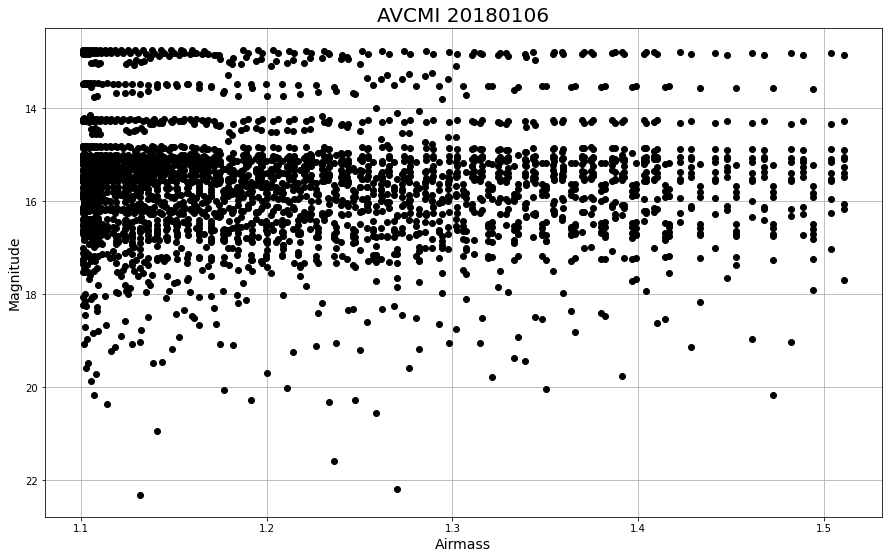

In [97]:
def read_dat(fname):
    
    """To read ASCII data file"""
    
    f = open(fname,'r')
    ID = []
    airmass = []
    filt = []
    JD = []
    mag_obs = []
    mag_err = []
    lines = f.readlines()
    
    for line in lines:
        values = line.split()
        #if(int(values[1])==3):
        ID.append(int(values[1]))
        airmass.append(float(values[2]))
        filt.append(float(values[3]))
        JD.append(float(values[4]))
        mag_obs.append(float(values[5]))
        mag_err.append(float(values[6]))
    return ID, airmass, filt, JD, mag_obs, mag_err

ID_1, airmass_1, filt_1, JD_1, mag_obs_1, mag_err_1 = read_dat('avcmi20180106')

ID_1 = np.array(ID_1)
airmass_1 = np.array(airmass_1)
mag_obs_1 = np.array(mag_obs_1)
mag_err_1 = np.array(mag_err_1)

plt.figure(figsize = (15,9))
plt.plot(airmass_1, mag_obs_1, 'ko')
# plt.errorbar(airmass_1, mag_obs_1, yerr=mag_err_1, fmt = 'o',color = 'r', ecolor = 'r', elinewidth = 5, capsize=10)
plt.gca().invert_yaxis()
plt.xlabel('Airmass',fontsize=14)
plt.ylabel('Magnitude',fontsize=14)
plt.title('AVCMI 20180106',fontsize=20)
plt.grid()
#plt.savefig("AVCMI_20180106.png") 
plt.show()

Maximum likelihood method:
m:  0.23236399544172454
b:  15.512231326299112


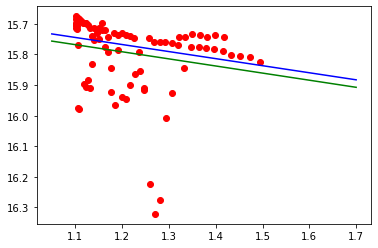

In [85]:

A = np.vander(airmass_1[(np.array(filt_1)==2) & (ID_1==3)], 2)
C = np.diag(mag_err_1[(np.array(filt_1)==2) & (ID_1==3)] * mag_err_1[(np.array(filt_1)==2) & (ID_1==3)])
ATA = np.dot(A.T, A/(mag_err_1[(np.array(filt_1)==2) & (ID_1==3)]**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, mag_obs_1[(np.array(filt_1)==2) & (ID_1==3)] / mag_err_1[(np.array(filt_1)==2) & (ID_1==3)]**2))


# Fit curve with likelihood method

def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma_square = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model)**2 / sigma_square + np.log(sigma_square))

np.random.seed(42)
nil = lambda *args: -log_likelihood(*args)
initial = np.array([0.2, 20, np.log(0.02)])
soln = minimize(nil, initial, args=(airmass_1[(np.array(filt_1)==2) & (ID_1==3)],
                                    mag_obs_1[(np.array(filt_1)==2) & (ID_1==3)], 
                                    mag_err_1[(np.array(filt_1)==2) & (ID_1==3)]))
mag_max_lik, b_max_lik, log_f_max_lik = soln.x
print("Maximum likelihood method:")
print("m: ", mag_max_lik)
print("b: ", b_max_lik)


plt.figure()
plt.plot(airmass_1[(np.array(filt_1)==2) & (ID_1==3)], mag_obs_1[(np.array(filt_1)==2) & (ID_1==3)], 'ro')
plt.gca().invert_yaxis()
xx = np.linspace(1.05, 1.7, 100)
yy = xx * w[0] + w[1]
yy2 = xx * mag_max_lik + b_max_lik
plt.plot(xx, yy, '-', color='b')
plt.plot(xx, yy2, '-', color='g')
plt.show()


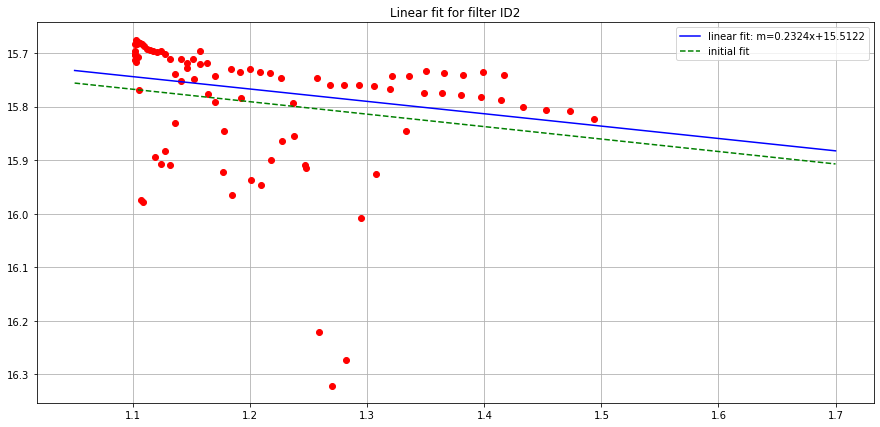

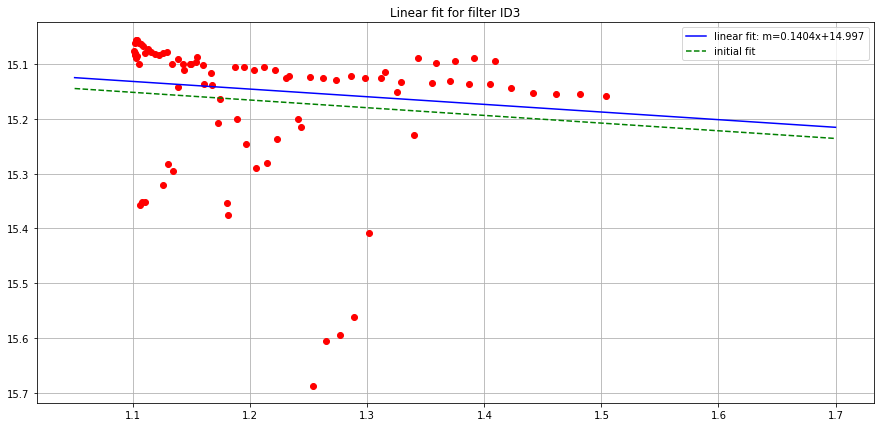

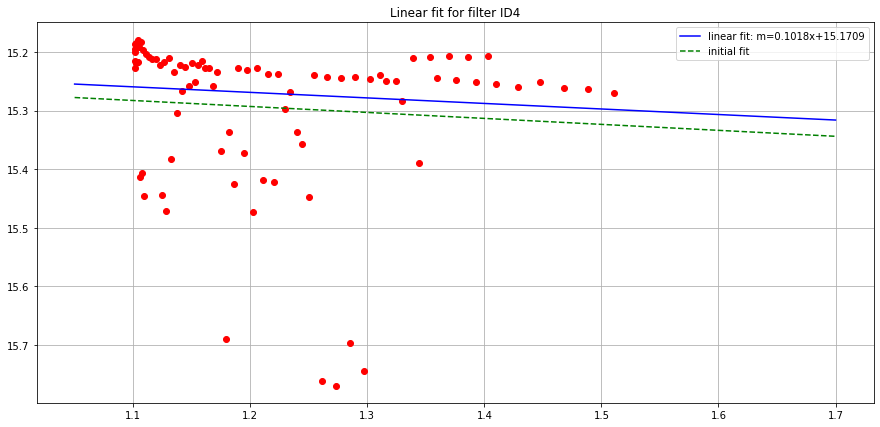

In [17]:
for i in list(np.arange(2,5,1)):
    A = np.vander(airmass_1[np.array(ID_1)==i], 2)
    C = np.diag(mag_err_1[np.array(ID_1)==i] * mag_err_1[np.array(ID_1)==i])
    ATA = np.dot(A.T, A/(mag_err_1[np.array(ID_1)==i]**2)[:, None])
    cov = np.linalg.inv(ATA)
    w = np.linalg.solve(ATA, np.dot(A.T, mag_obs_1[np.array(ID_1)==i] / mag_err_1[np.array(ID_1)==i]**2))
    #print("Least square method result: magnitude = Kx + b")
    #print(w[0], np.sqrt(cov[0,0]))
    #print(w[1], np.sqrt(cov[1,1]))
    
    def log_likelihood(theta, x, y, yerr):
        m, b, log_f = theta
        model = m * x + b
        sigma_square = yerr**2 + model**2 * np.exp(2 * log_f)
        return -0.5 * np.sum((y - model)**2 / sigma_square + np.log(sigma_square))

    np.random.seed(42)
    nil = lambda *args: -log_likelihood(*args)
    initial = np.array([0.2, 20, np.log(0.02)])
    soln = minimize(nil, initial, args=(airmass_1[np.array(ID_1)==i], mag_obs_1[np.array(ID_1)==i],
                                        mag_err_1[np.array(ID_1)==i]))
    mag_max_lik, b_max_lik, log_f_max_lik = soln.x
    #print("Maximum likelihood method:")
    #print("m: ", mag_max_lik)
    #print("b: ", b_max_lik)


    plt.figure(figsize=(15,7))
    plt.plot(airmass_1[np.array(ID_1)==i], mag_obs_1[np.array(ID_1)==i], 'ro')
    plt.gca().invert_yaxis()
    xx = np.linspace(1.05, 1.7, 100)
    yy = xx * w[0] + w[1]
    yy2 = xx * mag_max_lik + b_max_lik
    plt.plot(xx, yy, '-', color='b', label='linear fit: m='+str(round(mag_max_lik,4))+'x+'+
             str(round(b_max_lik, 4)))
    plt.plot(xx, yy2, '--', color='g', label='initial fit')
    plt.legend()
    plt.title('Linear fit for filter ID'+str(i))
    plt.grid()
    plt.show()

# AVCMI 20180207

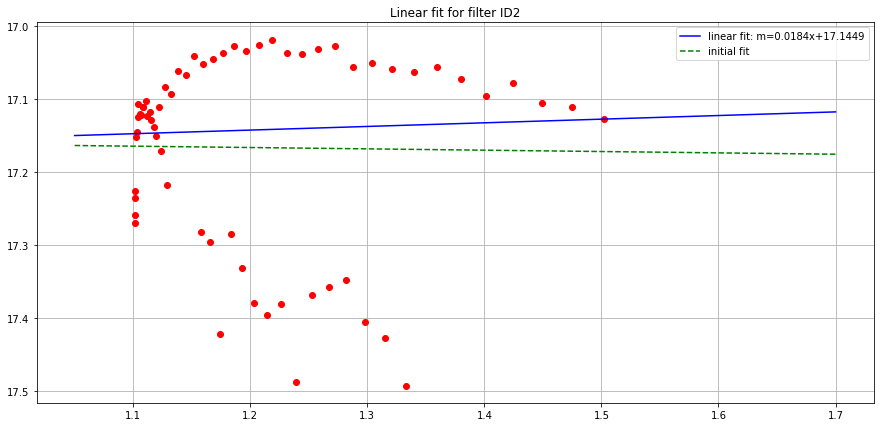

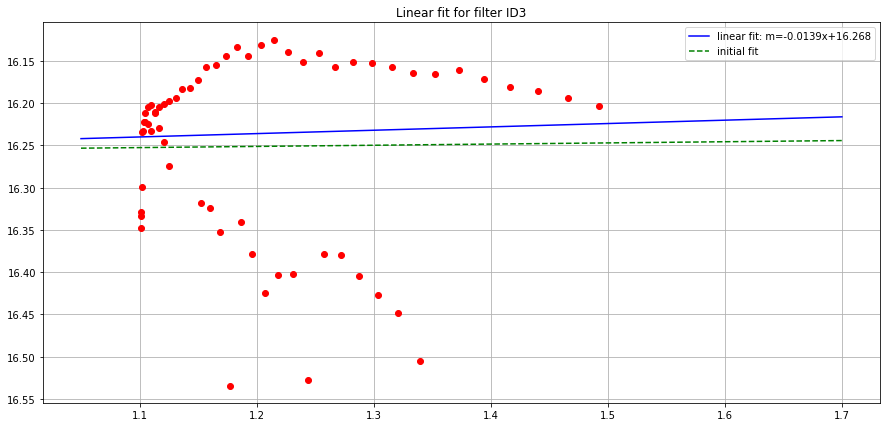

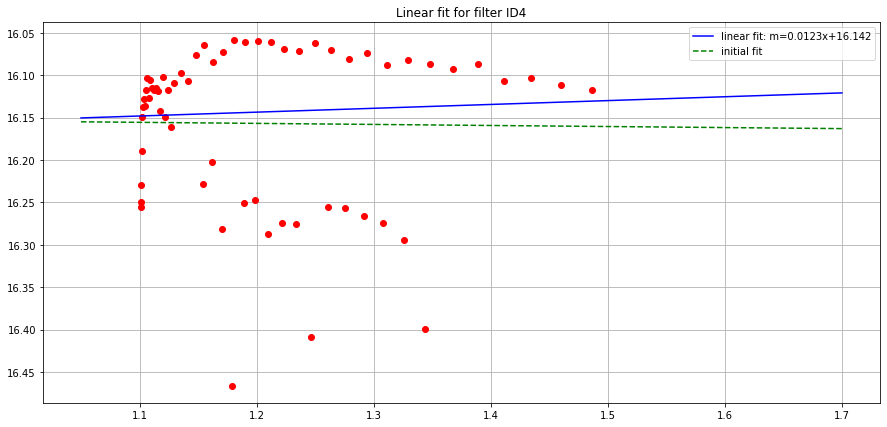

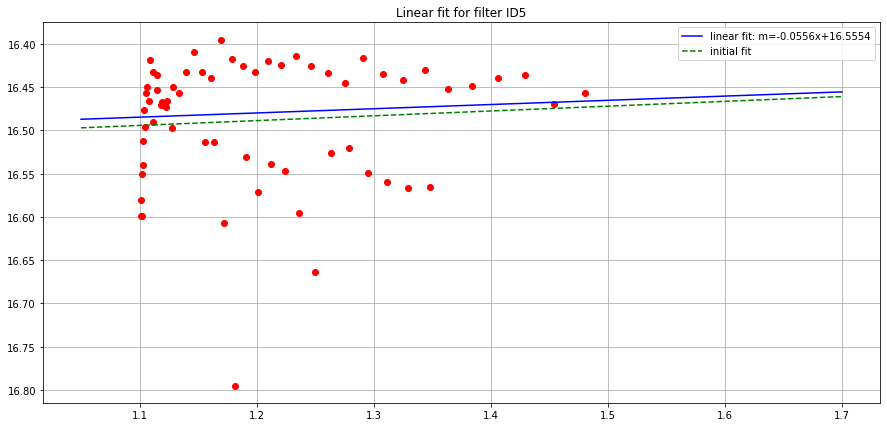

In [20]:
def read_dat(fname):
    
    """To read ASCII data file"""
    
    f = open(fname,'r')
    ID = []
    airmass = []
    JD = []
    mag_obs = []
    mag_err = []
    lines = f.readlines()
    
    for line in lines:
        values = line.split()
        if(int(values[1])==3):
            ID.append(float(values[3]))
            airmass.append(float(values[2]))
            JD.append(float(values[4]))
            mag_obs.append(float(values[5]))
            mag_err.append(float(values[6]))
    return ID, airmass, JD, mag_obs, mag_err

ID_1, airmass_1, JD_1, mag_obs_1, mag_err_1 = read_dat('avcmi20180207')

airmass_1 = np.array(airmass_1)
mag_obs_1 = np.array(mag_obs_1)
mag_err_1 = np.array(mag_err_1)

for i in list(np.arange(2,6,1)):
    A = np.vander(airmass_1[np.array(ID_1)==i], 2)
    C = np.diag(mag_err_1[np.array(ID_1)==i] * mag_err_1[np.array(ID_1)==i])
    ATA = np.dot(A.T, A/(mag_err_1[np.array(ID_1)==i]**2)[:, None])
    cov = np.linalg.inv(ATA)
    w = np.linalg.solve(ATA, np.dot(A.T, mag_obs_1[np.array(ID_1)==i] / mag_err_1[np.array(ID_1)==i]**2))
    #print("Least square method result: magnitude = Kx + b")
    #print(w[0], np.sqrt(cov[0,0]))
    #print(w[1], np.sqrt(cov[1,1]))
    
    def log_likelihood(theta, x, y, yerr):
        m, b, log_f = theta
        model = m * x + b
        sigma_square = yerr**2 + model**2 * np.exp(2 * log_f)
        return -0.5 * np.sum((y - model)**2 / sigma_square + np.log(sigma_square))

    np.random.seed(42)
    nil = lambda *args: -log_likelihood(*args)
    initial = np.array([0.2, 20, np.log(0.02)])
    soln = minimize(nil, initial, args=(airmass_1[np.array(ID_1)==i], mag_obs_1[np.array(ID_1)==i],
                                        mag_err_1[np.array(ID_1)==i]))
    mag_max_lik, b_max_lik, log_f_max_lik = soln.x
    #print("Maximum likelihood method:")
    #print("m: ", mag_max_lik)
    #print("b: ", b_max_lik)


    plt.figure(figsize=(15,7))
    plt.plot(airmass_1[np.array(ID_1)==i], mag_obs_1[np.array(ID_1)==i], 'ro')
    plt.gca().invert_yaxis()
    xx = np.linspace(1.05, 1.7, 100)
    yy = xx * w[0] + w[1]
    yy2 = xx * mag_max_lik + b_max_lik
    plt.plot(xx, yy, '-', color='b', label='linear fit: m='+str(round(mag_max_lik,4))+'x+'+
             str(round(b_max_lik, 4)))
    plt.plot(xx, yy2, '--', color='g', label='initial fit')
    plt.legend()
    plt.title('Linear fit for filter ID'+str(i))
    plt.grid()
    plt.show()

How the extinction coefficient depends on the fitter ? How it depends on te wavelength ? Comment it with the other parameters (error, ...). Submit the report before Friday 27th October.